## k−NN を使った手書き文字認識

### MNIST Data のダウンロード

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
X, y = shuffle(mnist.data, mnist.target)
X = X / 255.0
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, dev_X , train_y, dev_y = train_test_split(train_X, train_y, test_size=0.2)

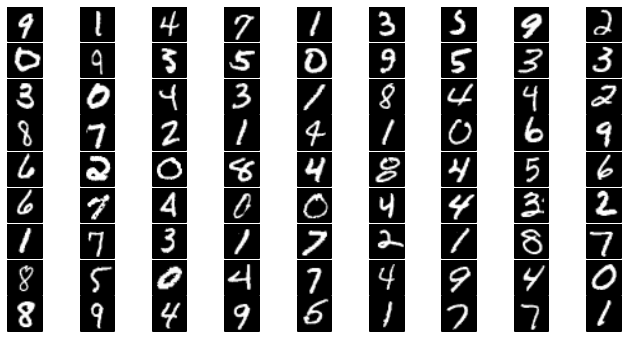

In [4]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28,28)), cmap='gray')

### Cosine 類似度

In [5]:
norm = numpy.linalg.norm(train_X, ord=2, axis=1)
normalized_train_X = train_X / norm[:,numpy.newaxis]

In [6]:
sample_1 = normalized_train_X[0]
sample_2 = normalized_train_X[1]
print numpy.dot(sample_1, sample_2)

0.491716358259


In [7]:
from sklearn.metrics import f1_score
from scipy import stats
def kNN(k, train_X, train_y, test_x):
    def most_common(neighbor_labels):
        return stats.mode(neighbor_labels).mode[0]
    def innerProduct(x1, x2):
        return numpy.dot(x1, x2)
    neighbor_labels = train_y[numpy.argsort([innerProduct(train_x, test_x) for train_x in train_X])[len(train_X)-k:len(train_X)]]
    pred_y = most_common(neighbor_labels)
    return pred_y

def kNN_f1_score_of(k, dev_X, dev_y):
    predicted_true_labels = [(kNN(k, dev_X, dev_y, dev_x), dev_y[i]) for i, dev_x in enumerate(dev_X)] 
    predicted_labels = [ data[0] for data in predicted_true_labels]
    true_labels = [ data[1] for data in predicted_true_labels]
    #print zip(true_labels, predicted_labels )
    return f1_score(true_labels, predicted_labels, average='macro')

def best_k(k_min, k_max, dev_X, dev_y):
    grid_search_res = [ {str(k): kNN_f1_score_of(k, dev_X, dev_y)} for k in range(k_min,k_max)]
    best_k = [k for k, v in sorted(grid_search_res.items(), key=lambda x:x[1])][0]
    return int(best_k)

k = best_k(2,10,train_X, train_y)
pred_y = kNN(k, train_X, train_y, test_X)

AttributeError: 'tuple' object has no attribute 'mode'

### k-NN でテストデータに対する予測